<a href="https://colab.research.google.com/github/EnneRebeca/An-lises-com-Python/blob/main/Atividade_2_Enne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A) Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados**

**Dataset: Análise de sentimentos em Rede Social**
 https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset
---

**Contexto**: O dataset foi extraido do Kaggle afim de auxiliar na execução do trabalho. O documento fornece como feactures Likes, retweets, platform (instagram, facebook etc) dentre outros. Nesse contexto, foi utilizado os "likes" e "Retweets" e as classes podem ser representados pelos sentimentos (positivos, negativos ou neutros) ou pelas hashtags analisadas, como #fitness e #food.

Bibliotecas utilizadas

In [65]:
#Bibliotecas utilizadas na atividade

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom

Carregando dataset

In [3]:
# Caminho do arquivo CSV
file_path = "sentimentdataset.csv"

# Leitura do arquivo
df = pd.read_csv(file_path)
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

## Criação do Histograma

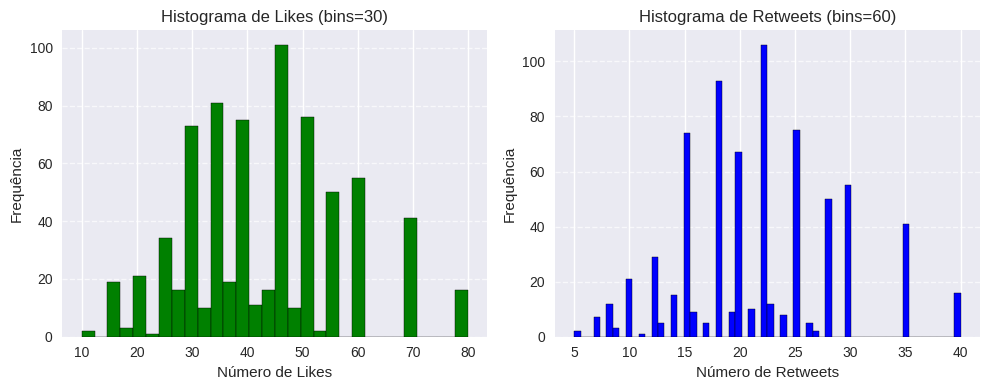

In [ ]:
# Limpeza de dados
df_clean = df.dropna(subset=['Likes','Retweets'])

# Número de Bins
bins_30 = 30
bins_60 = 60

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma: 30 bins
axes[0].hist(df_clean['Likes'], bins=bins_30, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes (bins={bins_30})')
axes[0].set_xlabel('Número de Likes')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma: 60 bins
axes[1].hist(df_clean['Retweets'], bins=bins_60, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets (bins={bins_60})')
axes[1].set_xlabel('Número de Retweets')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

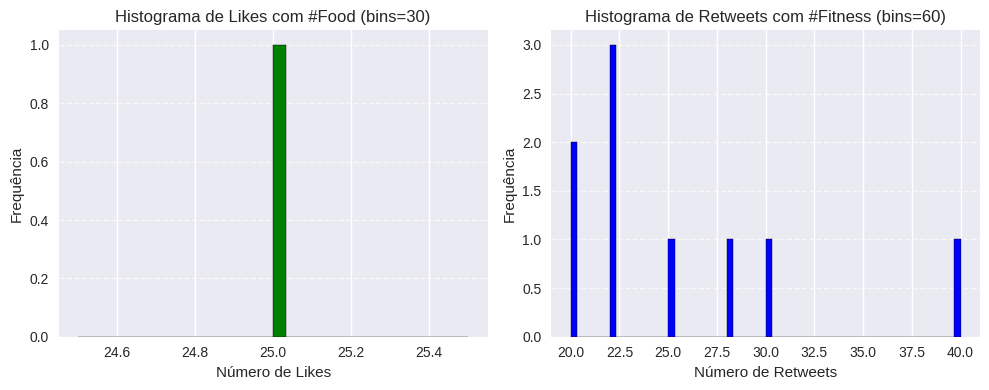

In [21]:
# Limpeza dos dados: removendo os valores nulls 'Likes' e 'Retweets'
df_clean = df.dropna(subset=['Likes', 'Retweets'])

# Filtro com a hashtag #Food
df_food = df_clean[df_clean['Hashtags'].str.contains('#Food', case=False, na=False)]

# Filtro com a hashtag #Fitness
df_fitness = df_clean[df_clean['Hashtags'].str.contains('#Fitness', case=False, na=False)]

# Número de Bins
bins_likes = 30  # Menos bins + intervalo por bin
bins_retweets = 60  # Mais bins - intervalo por bin

# Estilo do Matplotlib
plt.style.use('seaborn-v0_8')

# Dois subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Primeiro histograma
axes[0].hist(df_food['Likes'], bins=bins_likes, color='green', edgecolor='black')
axes[0].set_title(f'Histograma de Likes com #Food (bins={bins_likes})')
axes[0].set_xlabel('Número de Likes')
axes[0].set_ylabel('Frequência')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Segundo histograma
axes[1].hist(df_fitness['Retweets'], bins=bins_retweets, color='blue', edgecolor='black')
axes[1].set_title(f'Histograma de Retweets com #Fitness (bins={bins_retweets})')
axes[1].set_xlabel('Número de Retweets')
axes[1].set_ylabel('Frequência')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

**Discussão**:
1.   Histograma de Likes com a hashtag #Food: (bins=30) simplifica a apresentação do histograma, contudo os dados ficam concentrados.
O histograma indica que a hashtag #Food recebeu aproximadamente 25 likes, número de curtidas, sugerindo que essa concentração tendem a ter uma frequência de curtidas consistente.
2.  Histograma de Retweets com a  hashtag #Fitness: (bins=60) esse número de bins, mostra um menor intervalo por bin, ajuda na melhor visualização dos detalhes dos dados, assim como, ajuda a distinguir padrões de engajamento. Esse histograma possui uma distribuição mais dispersa, de 20 a 40 retweets, ou seja, tem maior variabilidade.

**B)** **Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.**

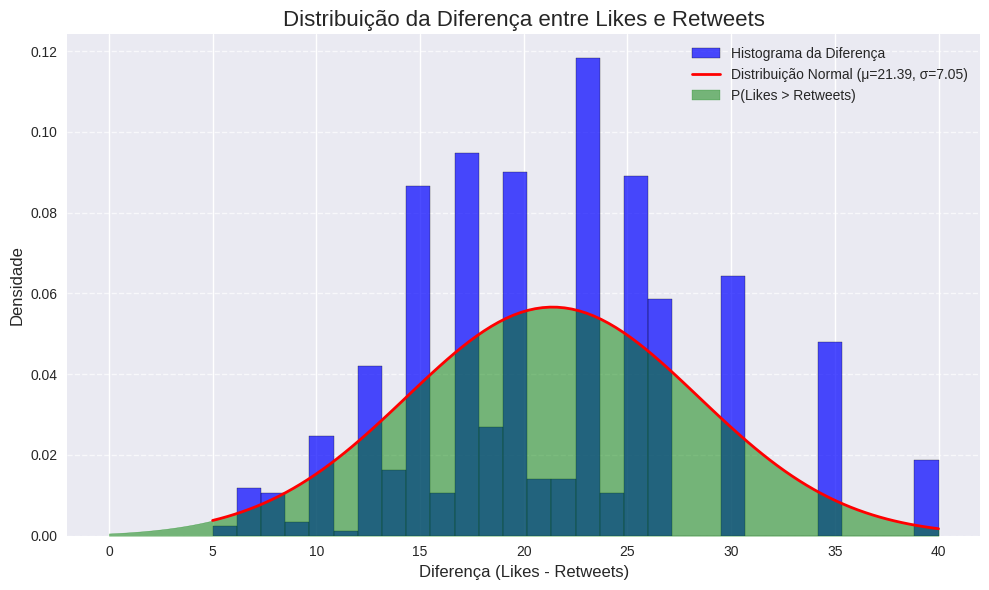

Probabilidade de ter mais Likes do que Retweets: 0.9988


In [37]:
# Calculando a diferença entre Likes e Retweets
df_clean['Difference'] = df_clean['Likes'] - df_clean['Retweets']

# Ajuste distribuição normal à diferença
mu_diff, sigma_diff = norm.fit(df_clean['Difference'])

# Valores x Curva de distribuição normal
x_diff = np.linspace(min(df_clean['Difference']), max(df_clean['Difference']), 100)
pdf_diff = norm.pdf(x_diff, mu_diff, sigma_diff)

# Curva de distribuição normal
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Difference'], bins=30, density=True, color='blue', alpha=0.7, edgecolor='black', label='Histograma da Diferença')
plt.plot(x_diff, pdf_diff, 'r-', lw=2, label=f'Distribuição Normal (μ={mu_diff:.2f}, σ={sigma_diff:.2f})')

# Destacar a área onde D > 0 (Likes > Retweets)
x_positive = np.linspace(0, max(df_clean['Difference']), 100)
pdf_positive = norm.pdf(x_positive, mu_diff, sigma_diff)
plt.fill_between(x_positive, pdf_positive, color='green', alpha=0.5, label='P(Likes > Retweets)')

# Títulos e rótulos
plt.title('Distribuição da Diferença entre Likes e Retweets', fontsize=16)
plt.xlabel('Diferença (Likes - Retweets)', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout
plt.tight_layout()
plt.show()

# Calcular a probabilidade de ter mais Likes > Retweets
z_score = (0 - mu_diff) / sigma_diff
prob_likes_greater_than_retweets = 1 - norm.cdf(z_score)
print(f"Probabilidade de ter mais Likes do que Retweets: {prob_likes_greater_than_retweets:.4f}")

**Discussão: **Hipoteticamente para a minha pesquisa, qual a probabilidade de sair mais likes do que retweets?

Probabilidade de ter mais** Likes do que Retweets**: 0.9988

Primeiro é calculado a diferença entre Likes e Retweets:
D= Likes - Retweets
Depois é ajustado a distribuição normal os valores da diferença, e obtém-se a média (μ_diff) e o desvio padrão (σ_diff). Onde a área destacada D > 0 é a que possui mais likes do que retweets. Para calcular a probabilidade D > 0 uso a função (norm.cdf()):
P(D > 0)=1 - P(D ≤ 0)

Após calculo o Z-score e os valores aleatório (50, 25, 5), obtém-se a área destacada em verde representa a probabilidade de uma publicação ter mais likes do que retweets.

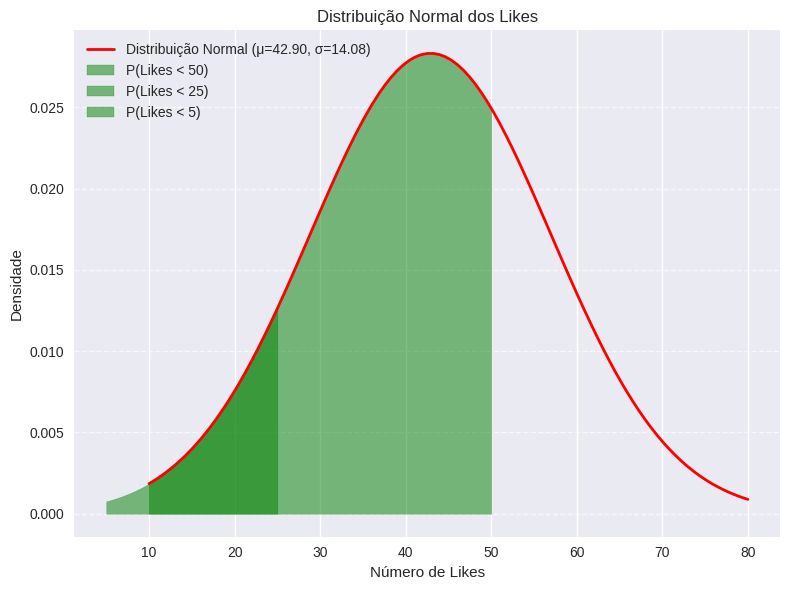

Z-score para 50 likes: 0.50
Probabilidade de ter menos de 50 likes: 0.6929

Z-score para 25 likes: -1.27
Probabilidade de ter menos de 25 likes: 0.1018

Z-score para 5 likes: -2.69
Probabilidade de ter menos de 5 likes: 0.0036



In [43]:
# Valores aleatórios
values_of_interest = [50, 25, 5]

# Calcular Z-scores e probabilidades
z_scores = [(value - mu) / sigma for value in values_of_interest]
probabilities = [norm.cdf(z_score) for z_score in z_scores]

# Plotar a distribuição normal com as áreas destacadas
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', lw=2, label=f'Distribuição Normal (μ={mu:.2f}, σ={sigma:.2f})')

# Destacar as áreas sob a curva os valores escolhidos
for value in values_of_interest:
    x_area = np.linspace(min(df_clean['Likes']), value, 100)
    pdf_area = norm.pdf(x_area, mu, sigma)
    plt.fill_between(x_area, pdf_area, color='green', alpha=0.5, label=f'P(Likes < {value})')

# Adicionar títulos e rótulos
plt.title('Distribuição Normal dos Likes')
plt.xlabel('Número de Likes')
plt.ylabel('Densidade')
plt.legend()

# Layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Resultado
for i, value in enumerate(values_of_interest):
    print(f"Z-score para {value} likes: {z_scores[i]:.2f}")
    print(f"Probabilidade de ter menos de {value} likes: {probabilities[i]:.4f}\n")

    # Filtro com a hashtag #Food
df_food = df_clean[df_clean['Hashtags'].str.contains('#Food', case=False, na=False)]

# Filtro com a hashtag #Fitness
df_fitness = df_clean[df_clean['Hashtags'].str.contains('#Fitness', case=False, na=False)]

No código abaixo é representado a probabilidade de likes e retweets por **hashtag**, os valores continuam sendo (50, 25, 5):
Foi calculado os Z-scores usando a fórmula Z= x-μ
                                            σ
Usamos norm.cdf(z_score) para calcular as probabilidades acumuladas. Se os dados forem insuficientes ou o desvio padrão for zero retorna uma mensagem.

In [63]:
#  Verificando se o desvio padrão é maior que zero.
# Ajuste na distribuição normal aos dados de 'Likes' (#Food)
if not df_food.empty and df_food['Likes'].std() > 0:
    mu_likes, sigma_likes = norm.fit(df_food['Likes'])
else:
    print("Dados insuficientes ou desvio padrão zero para Likes (#Food).")
    mu_likes, sigma_likes = None, None

# Ajuste na distribuição normal aos dados de 'Retweets' (#Fitness)
if not df_fitness.empty and df_fitness['Retweets'].std() > 0:
    mu_retweets, sigma_retweets = norm.fit(df_fitness['Retweets'])
else:
    print("Dados insuficientes ou desvio padrão zero para Retweets (#Fitness).")
    mu_retweets, sigma_retweets = None, None

# Valores aleatórios
values_of_interest = [50, 25, 5]

# Função para calcular Z-score e probabilidade acumulada
def calculate_probabilities(data, values):
    if data.std() == 0 or data.empty:
        print("Dados inválidos ou desvio padrão zero. Não é possível calcular probabilidades.")
        return pd.DataFrame()

    mu, sigma = norm.fit(data)
    results = []
    for value in values:
        z_score = (value - mu) / sigma
        probability = norm.cdf(z_score)

        # Verificação da probabilidade não ser negativa
        if probability < 0:
            print(f"Aviso: Probabilidade negativa encontrada para o valor {value}. Ajustando para 0.")
            probability = 0

        results.append({
            'Valor': value,
            'Z-score': z_score,
            'Probabilidade Acumulada': probability
        })
    return pd.DataFrame(results)

# Probabilidades para Likes (#Food)
if mu_likes is not None and sigma_likes is not None:
    probabilities_likes = calculate_probabilities(df_food['Likes'], values_of_interest)
    print("\nProbabilidades para Likes (#Food):\n")
    display(probabilities_likes.style.format({'Z-score': '{:.4f}', 'Probabilidade Acumulada': '{:.6f}'}))
else:
    print("\nNão foi possível calcular probabilidades para Likes (#Food).\n")

# Probabilidades para Retweets (#Fitness)
if mu_retweets is not None and sigma_retweets is not None:
    probabilities_retweets = calculate_probabilities(df_fitness['Retweets'], values_of_interest)
    print("\nProbabilidades para Retweets (#Fitness):\n")
    display(probabilities_retweets.style.format({'Z-score': '{:.4f}', 'Probabilidade Acumulada': '{:.6f}'}))
else:
    print("\nNão foi possível calcular probabilidades para Retweets (#Fitness).\n")

Dados insuficientes ou desvio padrão zero para Likes (#Food).

Não foi possível calcular probabilidades para Likes (#Food).


Probabilidades para Retweets (#Fitness):



,Valor,Z-score,Probabilidade Acumulada
0,50,4.0295,0.999972
1,25,-0.0729,0.470930
2,5,-3.3549,0.000397


C) Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras, conforme exemplo dos próximos slides.

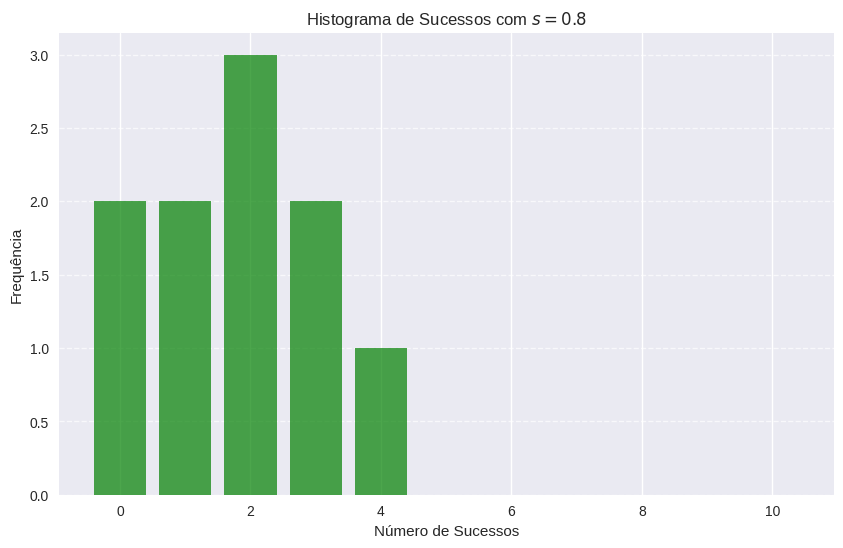

Comparação entre simulação e cálculo explícito:
x = 0: Simulação: 0.2000, Binomial: 0.0000
x = 1: Simulação: 0.2000, Binomial: 0.0000
x = 2: Simulação: 0.3000, Binomial: 0.0001
x = 3: Simulação: 0.2000, Binomial: 0.0008
x = 4: Simulação: 0.1000, Binomial: 0.0055
x = 5: Simulação: 0.0000, Binomial: 0.0264
x = 6: Simulação: 0.0000, Binomial: 0.0881
x = 7: Simulação: 0.0000, Binomial: 0.2013
x = 8: Simulação: 0.0000, Binomial: 0.3020
x = 9: Simulação: 0.0000, Binomial: 0.2684
x = 10: Simulação: 0.0000, Binomial: 0.1074


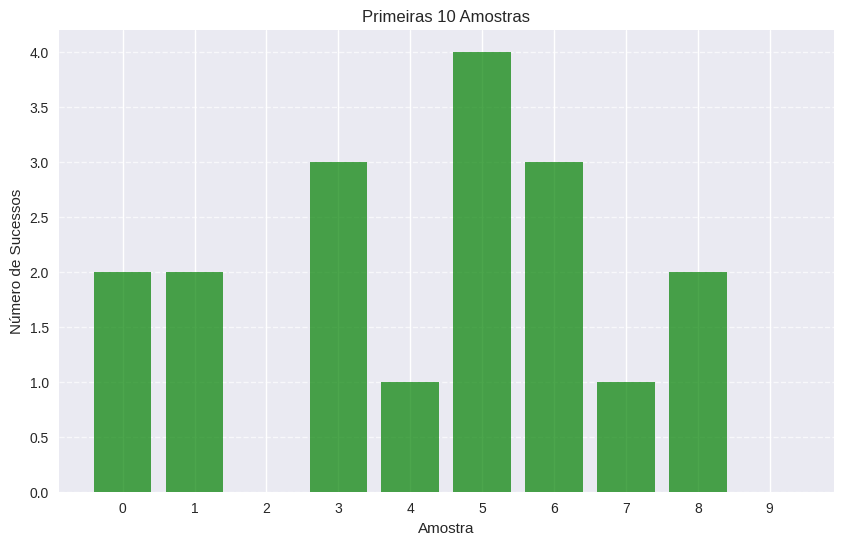

In [67]:
# Parâmetros da simulação
s = 0.80  # Probabilidade de sucesso
n = 10    # Número de tentativas por simulação
num_simulations = 10  # Número de simulações

# Simulação
np.random.seed(42)  # Para reprodutibilidade
samples = np.random.rand(num_simulations, n)  # Gerar amostras aleatórias
successes = np.sum(samples >= s, axis=1)  # Contar sucessos (valores >= s)

# Histograma das simulações
plt.figure(figsize=(10, 6))
plt.hist(successes, bins=np.arange(-0.5, n + 1.5), align='mid', rwidth=0.8, color='green', alpha=0.7)
plt.title(f'Histograma de Sucessos com $s = {s}$')
plt.xlabel('Número de Sucessos')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Cálculo explícito da probabilidade usando a distribuição binomial
p = s  # Probabilidade de sucesso
q = 1 - p  # Probabilidade de fracasso
x_values = np.arange(n + 1)  # Números de sucessos possíveis
probabilities = binom.pmf(x_values, n, p)  # Probabilidades binomiais

# Comparação entre simulação e cálculo explícito
print("Comparação entre simulação e cálculo explícito:")
for x in range(n + 1):
    print(f"x = {x}: Simulação: {np.mean(successes == x):.4f}, Binomial: {probabilities[x]:.4f}")

# Histograma das primeiras 10 amostras
plt.figure(figsize=(10, 6))
plt.bar(range(10), successes[:10], color='green', alpha=0.7)
plt.title('Primeiras 10 Amostras')
plt.xlabel('Amostra')
plt.ylabel('Número de Sucessos')
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()